<a href="https://colab.research.google.com/github/Ronin1289/Generating-Building-Drawings-Using-Image-Processing/blob/Experiments/Experiment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ezdxf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 14.1 MB/s eta 0:00:00


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

##Final Edge Detector 1.0 (Original)

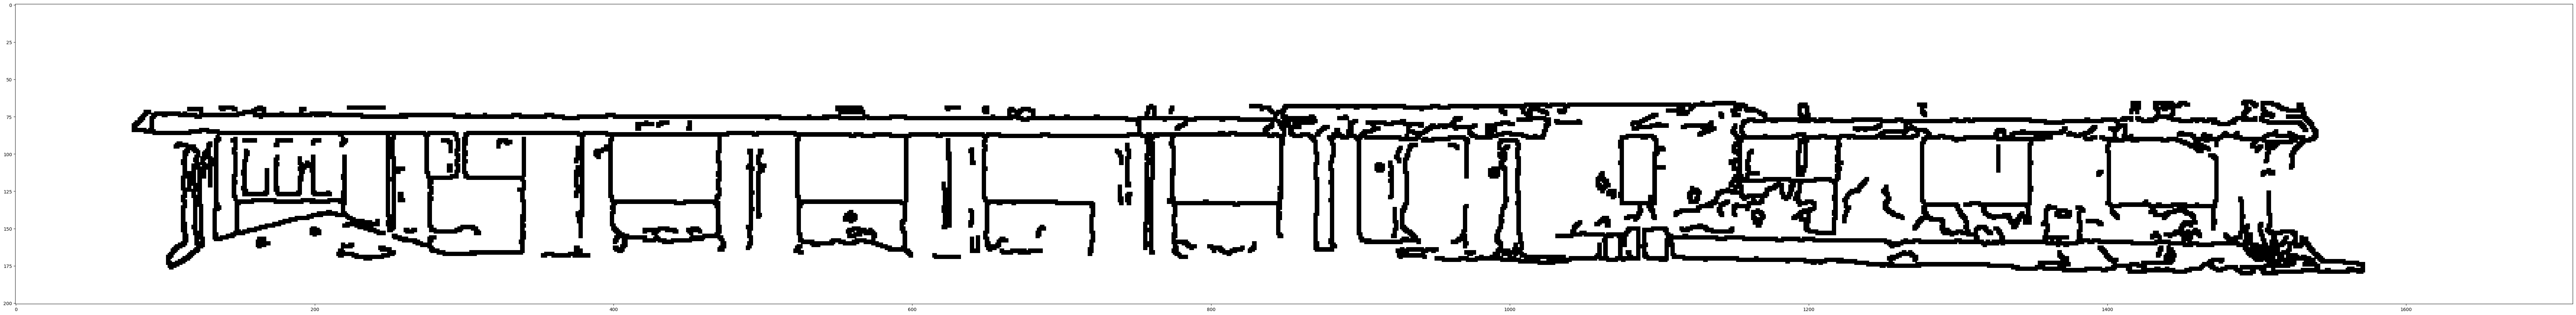

In [ ]:
img=cv2.imread('/content/drive/MyDrive/DATASETS/dco1.png')

a=1
if(a!=0):
  im1=cv2.GaussianBlur(img,(7,7),0)

im1=255-cv2.Canny(im1,70,100)
kernel = np.ones((1,1), np.uint8)
dilated = cv2.dilate(im1, kernel, iterations=1)
kernel = np.ones((3,3), np.uint8)
kernel2=np.ones((1,1), np.uint8)
eroded = cv2.erode(im1, kernel, iterations=1)
dilated = cv2.dilate(eroded, kernel2, iterations=1)

plt.figure(figsize=(100, 50))
plt.imshow(dilated,cmap='gray')


##Final Edge Detector 1.1

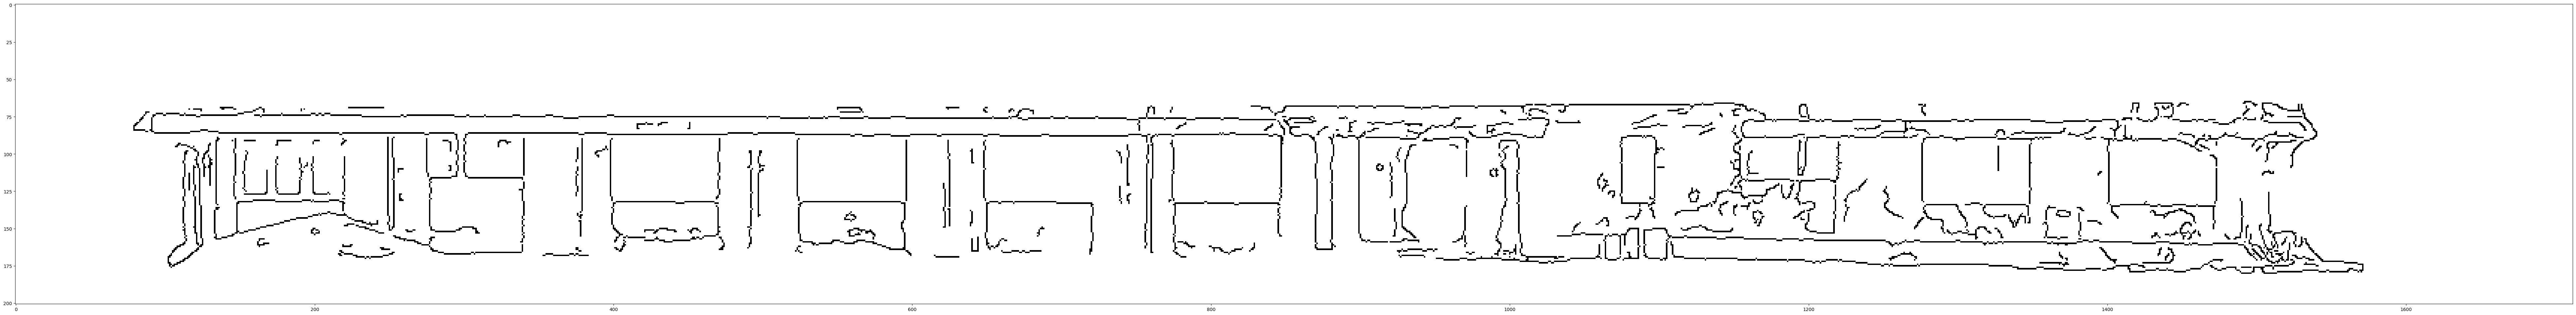

In [ ]:
img=cv2.imread('/content/drive/MyDrive/DATASETS/dco1.png')

#kernel = np.ones((3,3), np.uint8)
kernel2=np.ones((1,1), np.uint8)
kernel = np.ones((1,1), np.uint8)

a=1
if(a!=0):
  im1=cv2.GaussianBlur(img,(7,7),0)

im1=255-cv2.Canny(im1,70,100)

dilated = cv2.dilate(im1, kernel, iterations=1)

eroded = cv2.erode(im1, kernel, iterations=1)

dilated = cv2.dilate(eroded, kernel2, iterations=1)

plt.figure(figsize=(100, 50))
plt.imshow(eroded,cmap='gray')



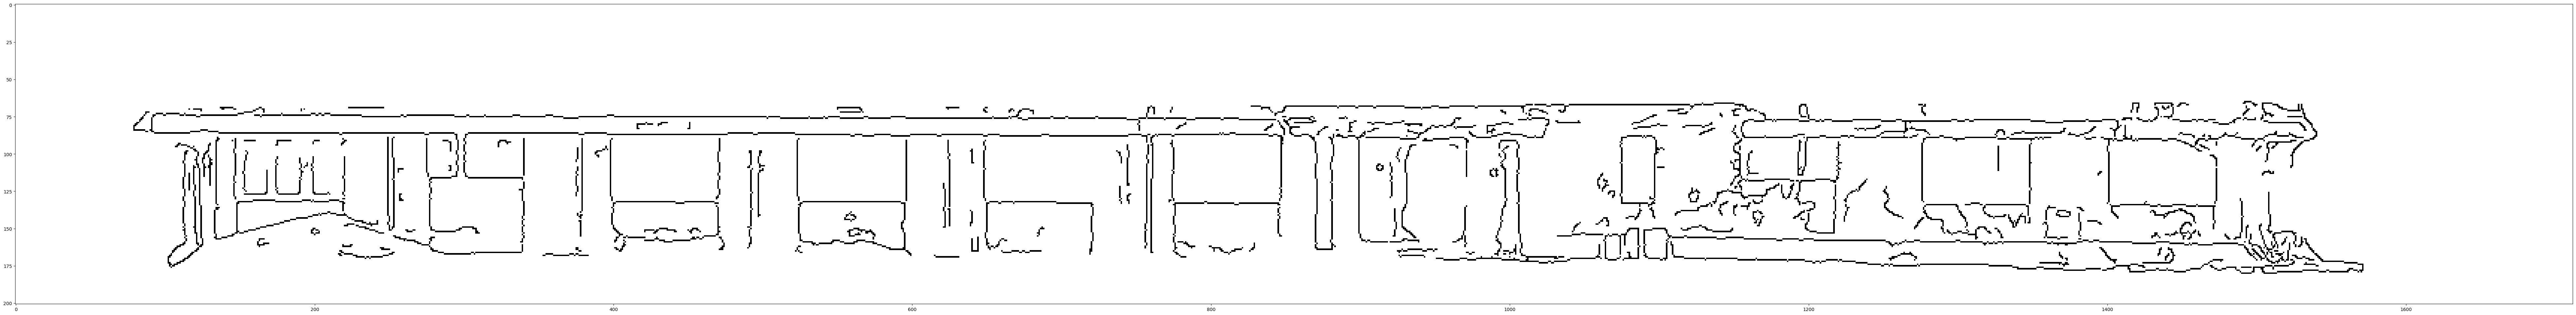

In [ ]:
kernel3=np.ones((1,1), np.uint8)
eroded2 = cv2.erode(dilated, kernel3, iterations=1)
plt.figure(figsize=(100, 50))
plt.imshow(eroded2,cmap='gray')

In [ ]:
import cv2
import numpy as np
import ezdxf

# Load the edge image
#imz = cv2.imread('/content/drive/MyDrive/DATASETS/lines.png', cv2.IMREAD_GRAYSCALE)
imz=dilated.copy()
#imz=255-imz

# Ensure the image is binary (thresholding)
_, binary = cv2.threshold(imz, 128, 255, cv2.THRESH_BINARY)

# Find coordinates of the edge pixels
edge_points = np.column_stack(np.where(binary > 128))  # Find all non-zero pixels (edges)

# Create a new DXF document with a specific version
doc = ezdxf.new('R2013')  # 'R2013' corresponds to AutoCAD 2013
msp = doc.modelspace()

# Add the edge points as polylines to the DXF
# Since edges are just single pixels, we need to create line segments for adjacent edge pixels
for i in range(len(edge_points) - 1):
    p1 = (edge_points[i][1], -edge_points[i][0])  # Flip x, y and invert y-axis
    p2 = (edge_points[i+1][1], -edge_points[i+1][0])
    msp.add_lwpolyline([p1, p2], close=True)

dxf_filename = "output.dxf"
doc.saveas(dxf_filename)

# Provide a download link for the DXF file
files.download(dxf_filename)

# # Save the DXF file
# doc.saveas('/content/drive/MyDrive/DATASETS/edges_output.dxf')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Final Edge Detector 1.2

In [ ]:
img=cv2.imread('/content/drive/MyDrive/DATASETS/lines.png')

kernel1 = np.ones((3,3), np.uint8)
kernel2=np.ones((1,1), np.uint8)
kernel3 = np.ones((1,1), np.uint8)

a=1
if(a!=0):
  im1=cv2.GaussianBlur(img,(7,7),0)

im1=255-cv2.Canny(im1,70,100)

dilated = cv2.dilate(im1, kernel1, iterations=1)

eroded = cv2.erode(im1, kernel2, iterations=1)

dilated = cv2.dilate(eroded, kernel1, iterations=1)


plt.figure(figsize=(100, 50))
plt.imshow(eroded,cmap='gray')
#plt.imshow(im1,cmap='gray')

In [ ]:
plt.figure(figsize=(100, 50))
plt.imshow(dilated,cmap='gray')
ims=dilated.copy()

In [ ]:
img=cv2.imread('/content/drive/MyDrive/DATASETS/dco1.png')
plt.figure(figsize=(100, 50))
plt.imshow(img,cmap='gray')

In [ ]:
im1=cv2.GaussianBlur(img,(3,3),0)
plt.imshow(im1,cmap='gray')

In [ ]:
im2=cv2.Canny(im1,100,100)
plt.imshow(im2)

In [ ]:
im3=255-im2
plt.figure(figsize=(100, 50))
plt.imshow(im3,cmap='gray')

##DILATION 1

In [ ]:
kernel = np.ones((3, 3), np.uint8)  # Adjust kernel size as needed

# Apply dilation
imd = cv2.dilate(im2, kernel, iterations=1)
imd=255-imd

plt.figure(figsize=(100, 50))
plt.axis('off')
plt.imshow(imd,cmap='gray')

##EROSION

In [ ]:
kernel_size = 3  # Adjust the size as needed
kernel = np.ones((kernel_size, kernel_size), np.uint8)

# Apply erosion
ime = cv2.erode(im3, kernel, iterations=1)

plt.figure(figsize=(10, 5))
plt.axis('off')
plt.imshow(ime,cmap='gray')

##EROSION DILATION
E1D1

In [ ]:
kernel_size = 3  # Adjust the size as needed
kernel = np.ones((kernel_size, kernel_size), np.uint8)

# Apply erosion
ime1 = cv2.erode(im3, kernel, iterations=1)
# Apply dilation
imd1 = cv2.dilate(ime1, kernel, iterations=1)


plt.figure(figsize=(100, 50))
plt.axis('off')
plt.imshow(imd1,cmap='gray')

In [ ]:
im7=imd1+im2
plt.figure(figsize=(100, 50))
plt.axis('off')
plt.imshow(im7,cmap='gray')

In [ ]:
im8=imd1-im7
im8=255-im8
plt.figure(figsize=(100, 50))
plt.axis('off')
plt.imshow(im8,cmap='gray')

#DXF CODE

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#Python Imaging Library (PIL) module for image processing
from PIL import Image

#numpy for numerical operations and handling arrays
import numpy as np

#skimage.measure for image analysis and measurement, such as finding contours or regions
from skimage import measure

#Google Colab's files module to upload or download files within a Colab environment
from google.colab import files

#ezdxf to work with DXF files, which are commonly used in CAD applications
import ezdxf


In [ ]:
#Loading image
imz=cv2.imread('/content/drive/MyDrive/DATASETS/lines.png',cv2.IMREAD_GRAYSCALE)
ims=np.array(imz)
binary = (ims > 128).astype(int)
plt.imshow(binary)

In [ ]:
# Find contours using scikit-image
contours = measure.find_contours(binary, level=0.5)

# Create a new DXF document with a specific version
doc = ezdxf.new('R2013')  # 'R2013' corresponds to AutoCAD 2013 (or any other version you prefer)
msp = doc.modelspace()

# Add contours to the DXF
for contour in contours:
    points = [(point[1], -point[0]) for point in contour]  # Flip x and y and invert y-axis
    # Add polyline to the DXF, ensuring it's closed
    polyline = msp.add_lwpolyline(points)
    polyline.close(False)  # Close the polyline



Display dxf

In [ ]:
import matplotlib.pyplot as plt

# Plot the binary image with contours overlaid
fig, ax = plt.subplots(figsize=(40,40))
ax.imshow(binary, cmap='gray')  # Display the binary image
for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=1)  # Plot each contour (x, y)

ax.set_title('Detected Contours')
ax.axis('off')  # Turn off axis for better visibility
plt.show()


Download dxf

In [ ]:
dxf_filename = "output.dxf"
doc.saveas(dxf_filename)

# Provide a download link for the DXF file
files.download(dxf_filename)

##DXF code 1.1

In [ ]:
import cv2
import numpy as np
import ezdxf

# Load the edge image
#imz = cv2.imread('/content/drive/MyDrive/DATASETS/lines.png', cv2.IMREAD_GRAYSCALE)

imz=

# Ensure the image is binary (thresholding)
_, binary = cv2.threshold(imz, 128, 255, cv2.THRESH_BINARY)

# Find coordinates of the edge pixels
edge_points = np.column_stack(np.where(binary > 128))  # Find all non-zero pixels (edges)

# Create a new DXF document with a specific version
doc = ezdxf.new('R2013')  # 'R2013' corresponds to AutoCAD 2013
msp = doc.modelspace()

# Add the edge points as polylines to the DXF
# Since edges are just single pixels, we need to create line segments for adjacent edge pixels
for i in range(len(edge_points) - 1):
    p1 = (edge_points[i][1], -edge_points[i][0])  # Flip x, y and invert y-axis
    p2 = (edge_points[i+1][1], -edge_points[i+1][0])
    msp.add_lwpolyline([p1, p2], close=False)

# Save the DXF file
doc.saveas('/content/drive/MyDrive/DATASETS/edges_output.dxf')
